# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [267]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [268]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [269]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [270]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | luis correia
Processing Record 8 of Set 1 | tofol
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | pushkinskiye gory
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | thinadhoo
Processing Record 20 of Set 1 | san jose del guaviare
Processing Record 21 of Set 1 | puerto natales
Processing Record

In [271]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [272]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.06,67,40,9.44,SH,1691597483
1,yellowknife,62.4560,-114.3525,18.29,55,100,5.66,CA,1691597483
2,avarua,-21.2078,-159.7750,22.03,73,75,6.69,CK,1691597483
3,atafu village,-8.5421,-172.5159,28.09,80,98,5.91,TK,1691597483
4,albany,42.6001,-73.9662,26.43,65,86,0.45,US,1691597483


In [273]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [274]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.06,67,40,9.44,SH,1691597483
1,yellowknife,62.4560,-114.3525,18.29,55,100,5.66,CA,1691597483
2,avarua,-21.2078,-159.7750,22.03,73,75,6.69,CK,1691597483
3,atafu village,-8.5421,-172.5159,28.09,80,98,5.91,TK,1691597483
4,albany,42.6001,-73.9662,26.43,65,86,0.45,US,1691597483


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

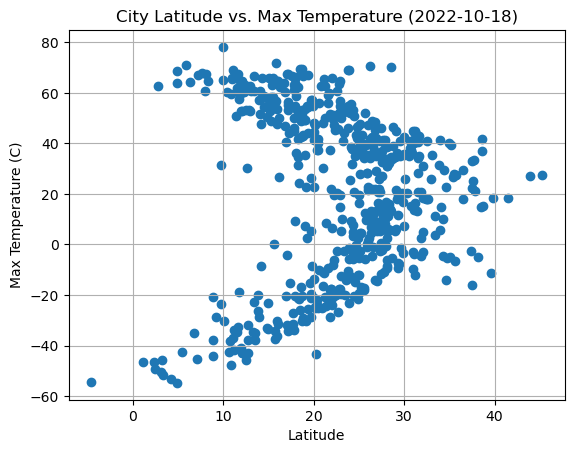

In [275]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

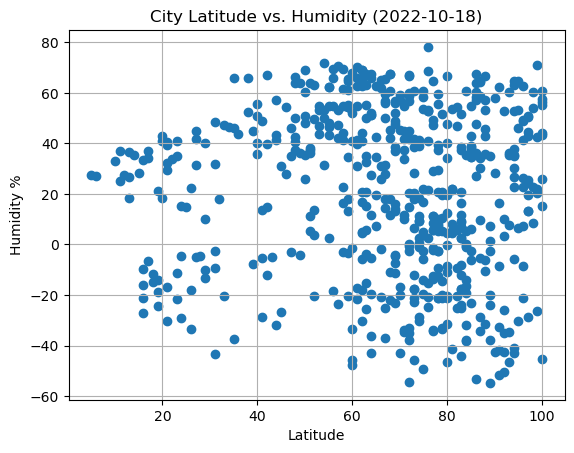

In [276]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

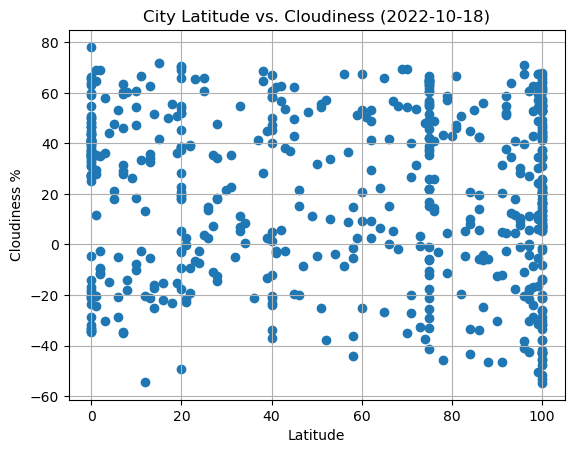

In [277]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

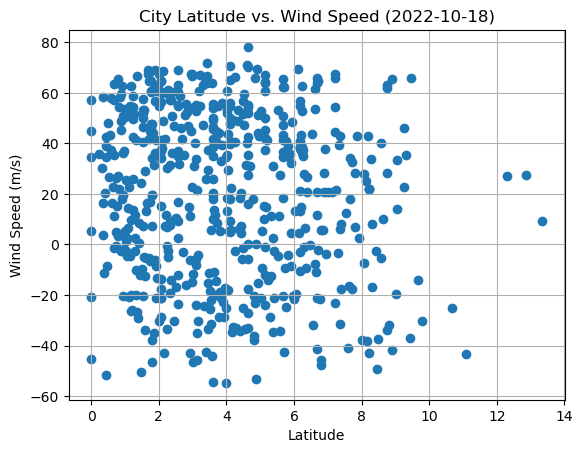

In [278]:
plt.scatter(city_data_df['Wind Speed'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [279]:
# Define a function to create Linear Regression plots
# original work does not work 
# def linere(x, y, lincoord):    
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#     regress = x * slope + intercept
#     #line provided by ask BCS as my version was assumed to cause an error by ctwitchell
#     line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     print(f"The r-value is: {rvalue**2}")
#     plt.annotate(line, lincoord, color = 'red')
#     plt.plot(x, regress)
#     plt.scatter(x, y)
#     plt.show()

#code provided by askbcs as mine would not function to make the line red and printing the color. 'r-' w
def lregress(x, y, lincoord):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress, 'r-')
    plt.annotate(line, lincoord, color = "red")
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [280]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,18.29,55,100,5.66,CA,1691597483
4,albany,42.6001,-73.9662,26.43,65,86,0.45,US,1691597483
7,tofol,5.3248,163.0078,27.28,78,67,3.80,FM,1691597484
8,lata,40.1629,-8.3327,31.07,40,40,4.60,PT,1691597484
9,klyuchi,52.2667,79.1667,23.32,38,48,2.83,RU,1691597484


In [281]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.06,67,40,9.44,SH,1691597483
2,avarua,-21.2078,-159.7750,22.03,73,75,6.69,CK,1691597483
3,atafu village,-8.5421,-172.5159,28.09,80,98,5.91,TK,1691597483
5,port-aux-francais,-49.3500,70.2167,2.44,75,20,8.47,TF,1691597483
6,luis correia,-2.8792,-41.6669,31.00,58,20,6.17,BR,1691597267


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.385353698331912


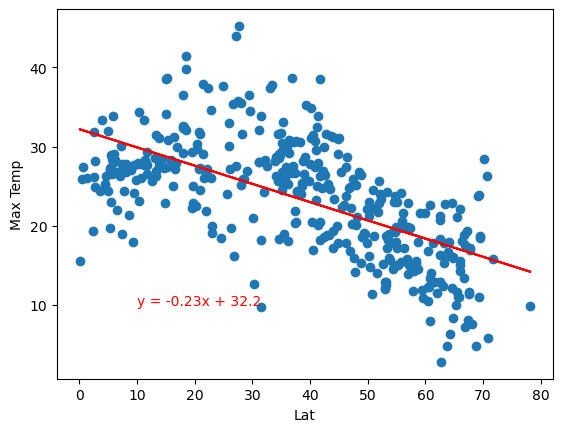

In [282]:
# Linear regression on Northern Hemisphere
lregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10, 10))


The r-value is: 0.6968877019212834


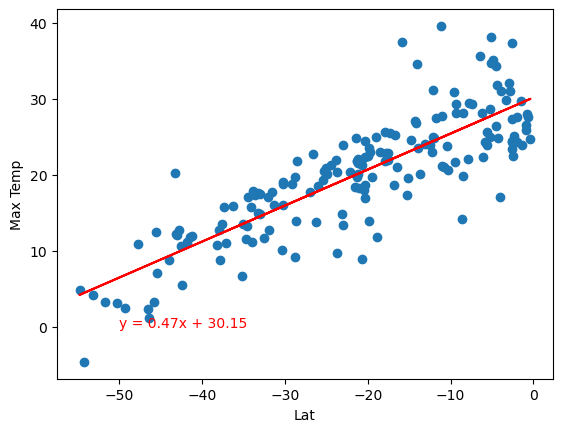

In [283]:
# Linear regression on Southern Hemisphere
lregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-50,0))


**Discussion about the linear relationship:** It makes complete sense we see temperatures increasing as they approach 0, the equator, and decreasing as they move away from it towards the poles. The equator is the warmest latititue generally speaking when it comes to the planets weather. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0035405169283960368


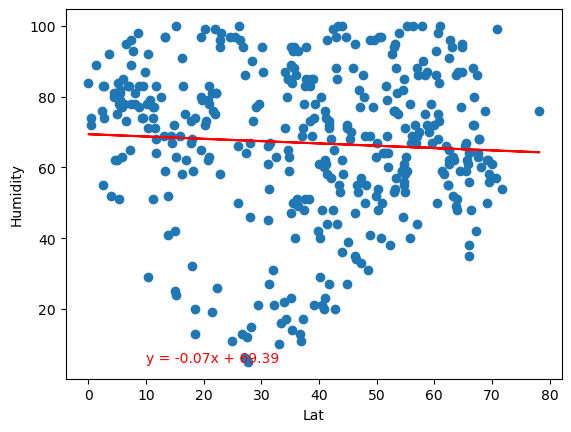

In [292]:
# Northern Hemisphere
lregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (10, 5))

The r-value is: 0.0479834914564259


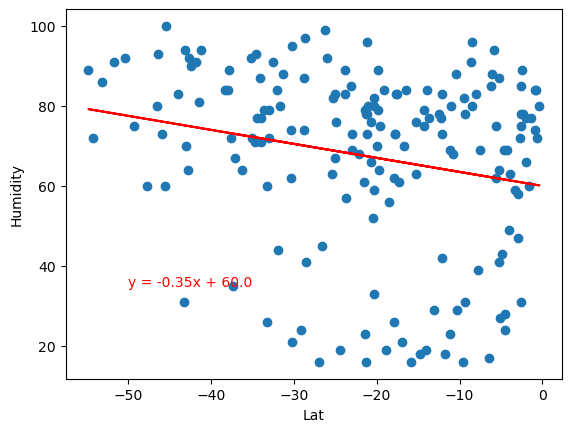

In [285]:
# Southern Hemisphere
lregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-50, 35))

**Discussion about the linear relationship:** Humidity appears to be pretty interesting across both hemistpheres in relation to latitute. There appears to be a slight relation to less humitity the closer to the equator in the northwen hemisphere, however it is much more dramatic in the southern. Warmer weather would mean drier climates in theory. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.016084114312168878


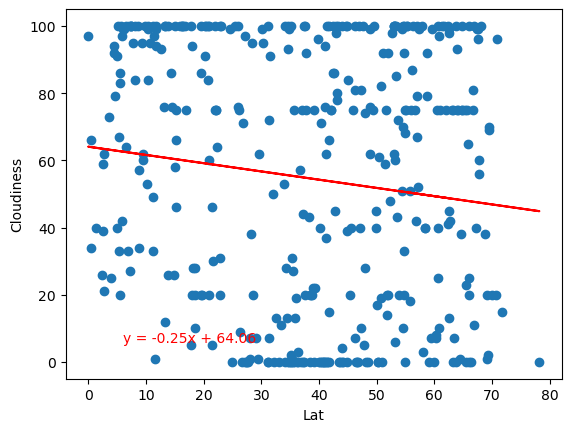

In [291]:
# Northern Hemisphere
lregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (6, 6))

The r-value is: 0.045232343776525824


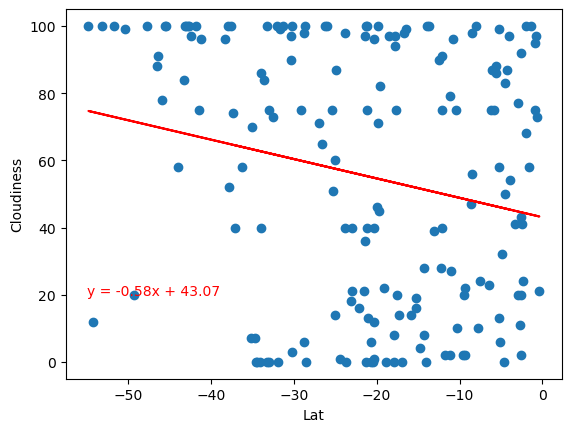

In [290]:
# Southern Hemisphere
lregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-55, 20))

**Discussion about the linear relationship:** In the northern hemi we see cloudiness decreasing when moving away from the equator which is the opposite of the southern hemi where we see cloudiness increase when moving away from the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006690437051487915


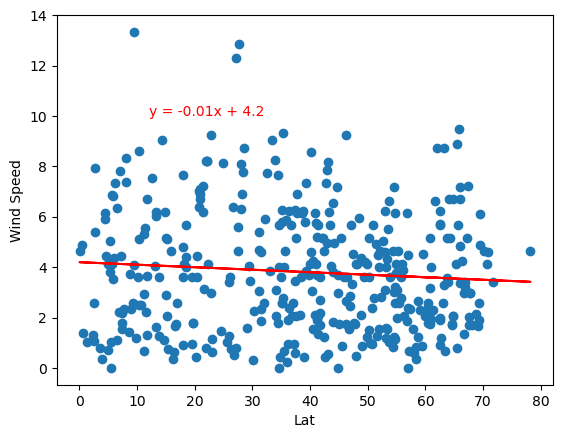

In [293]:
# Northern Hemisphere
lregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (12, 10))

The r-value is: 0.021927007085336812


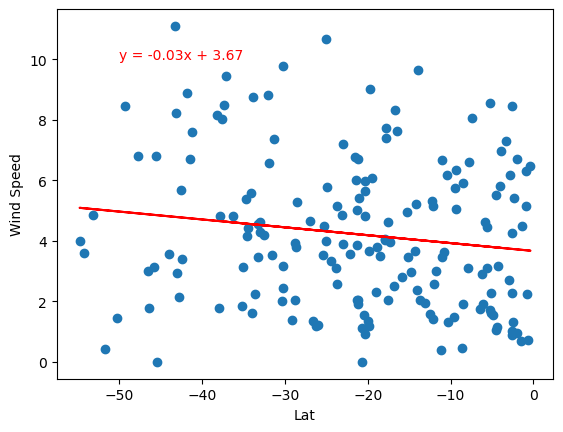

In [294]:
# Southern Hemisphere
lregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-50, 10))

**Discussion about the linear relationship:** Wind speeds in the northern hemi are pretty consistent as you move further from the equator, similarly minimal change in the southern hemiphere however slightly more pronouced relationship in the regression. 